In [2]:
import pandas as pd

df = pd.read_csv("imdb_top_1000.csv")
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:

df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(int)


df["Gross"] = df["Gross"].str.replace(",", "")

df["Gross"] = pd.to_numeric(df["Gross"], errors='coerce')

df = df.dropna(subset=["IMDB_Rating", "No_of_Votes"])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    float64
dtypes: float64(3), int64(2), object(11)
memory usage: 125.1+ KB


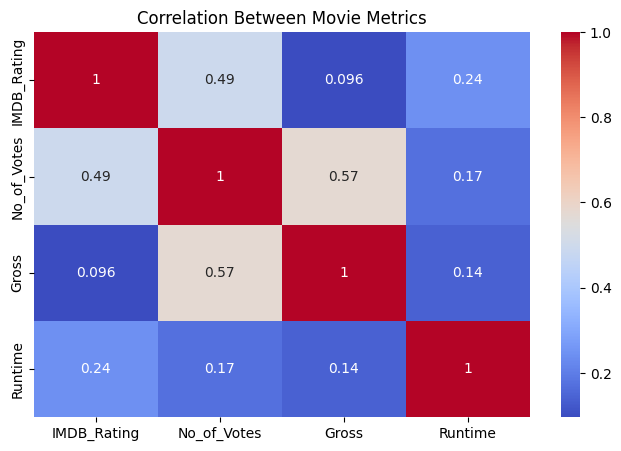

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.heatmap(df[["IMDB_Rating", "No_of_Votes", "Gross", "Runtime"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Movie Metrics")
plt.show()


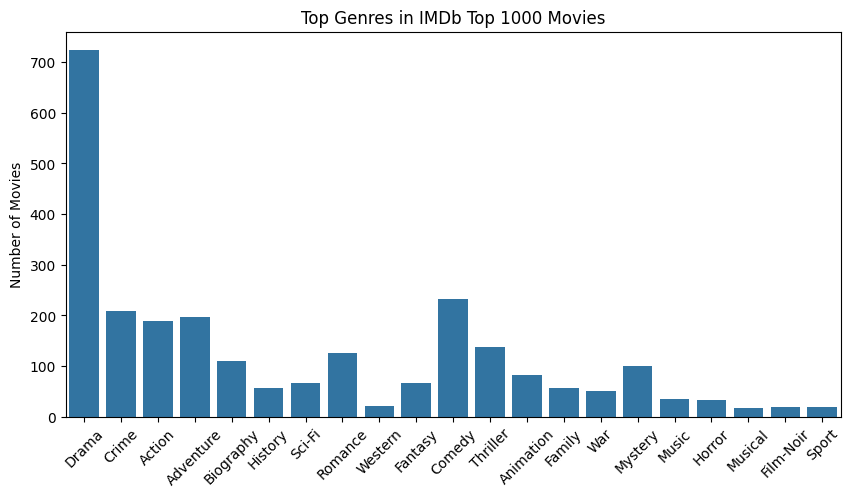

In [5]:
from collections import Counter

genre_list = df['Genre'].str.split(', ')
flat_genres = [genre for sublist in genre_list for genre in sublist]
genre_counts = Counter(flat_genres)

plt.figure(figsize=(10,5))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=45)
plt.title("Top Genres in IMDb Top 1000 Movies")
plt.ylabel("Number of Movies")
plt.show()


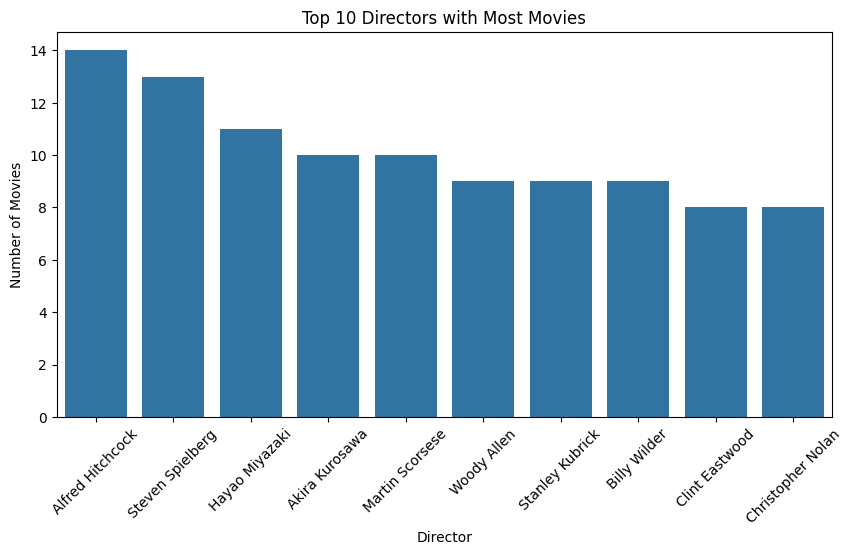

In [6]:
top_directors = df['Director'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.xticks(rotation=45)
plt.title("Top 10 Directors with Most Movies")
plt.ylabel("Number of Movies")
plt.show()


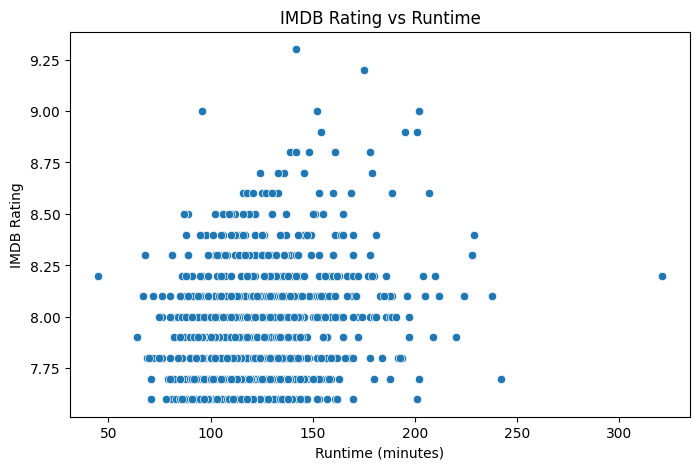

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Runtime', y='IMDB_Rating', data=df)
plt.title("IMDB Rating vs Runtime")
plt.xlabel("Runtime (minutes)")
plt.ylabel("IMDB Rating")
plt.show()
